In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [3]:
x = df.drop(['target'],axis=1).values
y = df[['target']].values

In [4]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x,y)

LinearRegression()

In [6]:
y_pred = lin.predict(x_test)

### 1.Linear Relationship

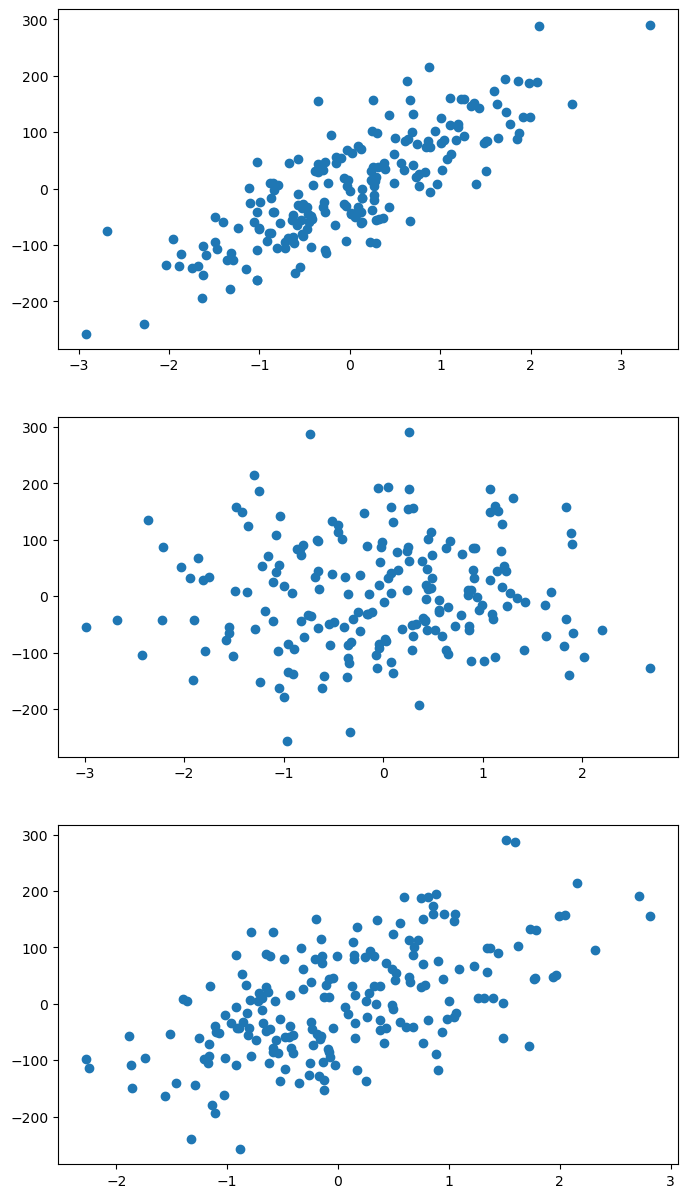

In [49]:
import matplotlib.pyplot as plt
# linear relationship exist b/w input and output cols
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
plt.scatter(df['feature1'],df['target'])
plt.subplot(3,1,2)
plt.scatter(df['feature2'],df['target'])
plt.subplot(3,1,3)
plt.scatter(df['feature3'],df['target'])

### 2.Multicollinearity

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = []
# there is no relation ship exist b/w input cols
for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train,i))

In [17]:
pd.DataFrame({'vif':vif},index=df.columns[0:3]).T
# if any value is >= 5 -> it is multi collinear

,feature1,feature2,feature3
vif,1.00195,1.011273,1.011211


<Axes: >

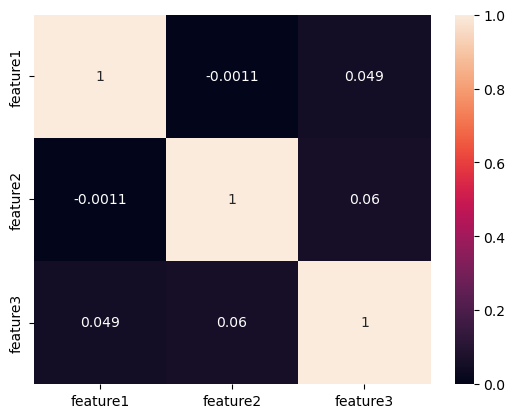

In [21]:
## method 2
import seaborn as sns
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

### 3.Normality of Residual

In [24]:
residuals = y_test - y_pred

<Axes: ylabel='Density'>

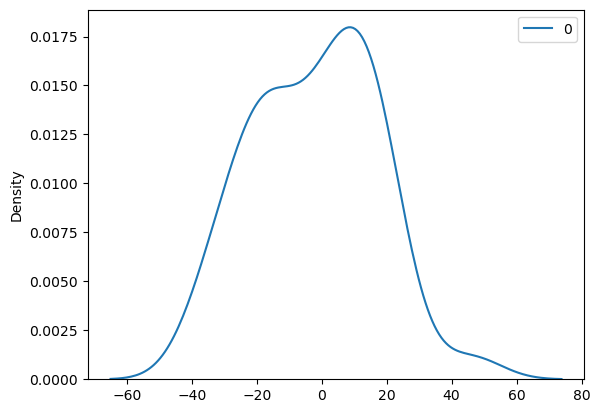

In [51]:
sns.kdeplot(residuals)
# residual plot should be normal

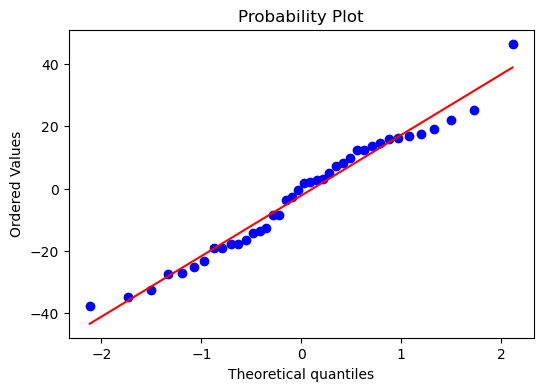

In [43]:
## QQ plot
import scipy as sp
fig , ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(x=residuals.ravel(),plot=ax,fit=True,dist='norm')
plt.show()

### 4.Homostedasticity

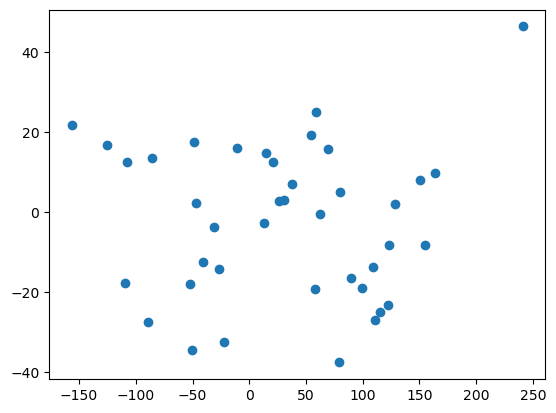

In [46]:
plt.scatter(y_pred,residuals)
# the grapth spred uniformly -> Homostedasticity

### 5.Autocorrelation of residuals

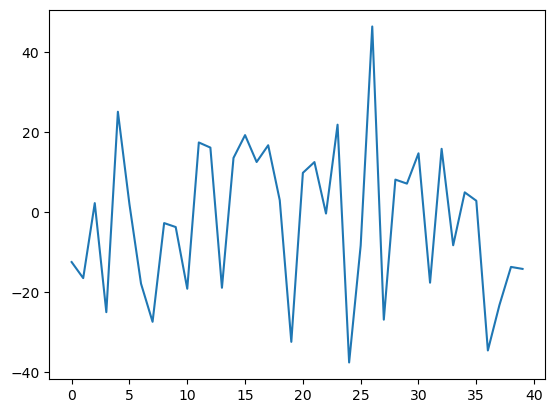

In [48]:
plt.plot(residuals)
# there is no pattern in residual